In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv("tx-house-sales.csv")
df.head()


,city,sales,volume,avgprice,listings,onmarket,month,year,date
0,Abilene,72.0,5380000.0,74700.0,701.0,6.3,1,2000,2000.000000
1,Abilene,98.0,6505000.0,66400.0,746.0,6.6,2,2000,2000.083333
2,Abilene,130.0,9285000.0,71400.0,784.0,6.8,3,2000,2000.166667
3,Abilene,98.0,9730000.0,99300.0,785.0,6.9,4,2000,2000.250000
4,Abilene,141.0,10590000.0,75100.0,794.0,6.8,5,2000,2000.333333


In [67]:
df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5040 entries, 0 to 5039
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   city      5040 non-null   object 
 1   sales     4674 non-null   float64
 2   volume    4674 non-null   float64
 3   avgprice  4674 non-null   float64
 4   listings  3795 non-null   float64
 5   onmarket  3765 non-null   float64
 6   month     5040 non-null   int64  
 7   year      5040 non-null   int64  
 8   date      5040 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 354.5+ KB


(None,
              sales        volume       avgprice      listings     onmarket  \
 count  4674.000000  4.674000e+03    4674.000000   3795.000000  3765.000000   
 mean    548.424262  9.609607e+07  137539.751819   3676.218182     6.643586   
 std    1094.480402  2.134674e+08   40437.051217   6685.244699     4.706227   
 min       3.000000  1.550000e+05   26700.000000     54.000000     0.800000   
 25%      87.000000  1.004125e+07  107800.000000    705.500000     5.000000   
 50%     173.000000  2.122750e+07  128450.000000   1322.000000     6.000000   
 75%     482.750000  7.076335e+07  162875.000000   3374.500000     7.000000   
 max    8628.000000  1.795898e+09  285300.000000  43107.000000    82.000000   
 
              month         year         date  
 count  5040.000000  5040.000000  5040.000000  
 mean      6.357143  2004.178571  2004.625000  
 std       3.476943     2.700183     2.694461  
 min       1.000000  2000.000000  2000.000000  
 25%       3.000000  2002.000000  2002.3

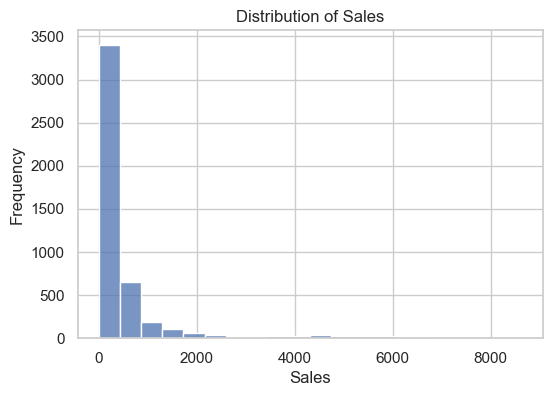

In [41]:
plt.figure(figsize=(6, 4))
sns.histplot(df_cleaned['sales'], bins=20)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

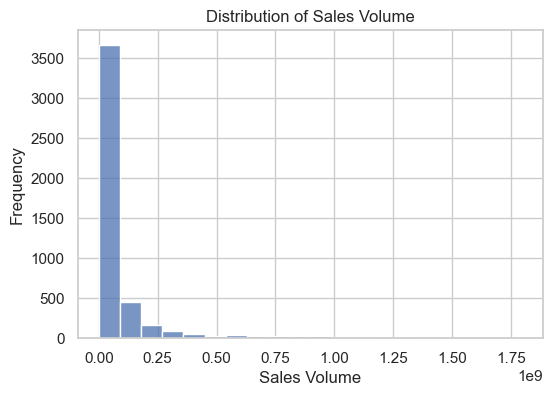

In [42]:
plt.figure(figsize=(6, 4))
sns.histplot(df_cleaned['volume'], bins=20)
plt.title('Distribution of Sales Volume')
plt.xlabel('Sales Volume')
plt.ylabel('Frequency')
plt.show()

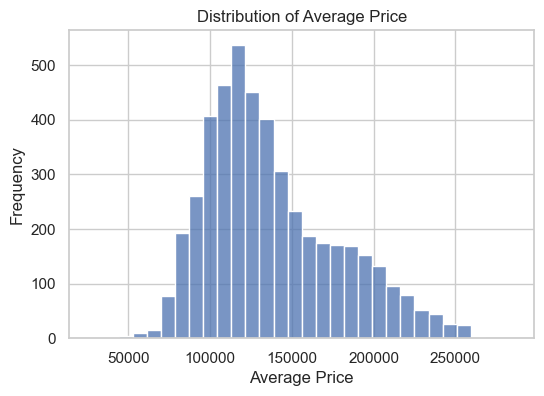

In [43]:
plt.figure(figsize=(6, 4))
sns.histplot(df_cleaned['avgprice'], bins=30)
plt.title('Distribution of Average Price')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.show()


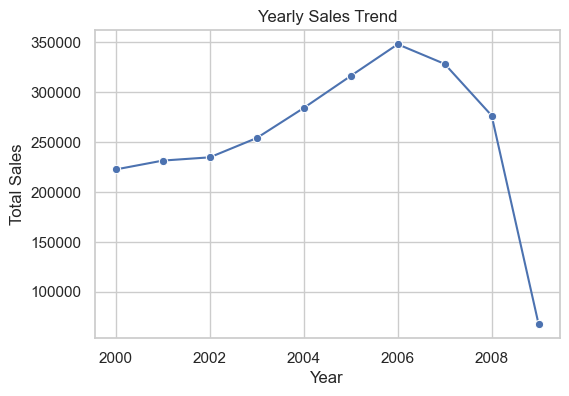

In [44]:
plt.figure(figsize=(6, 4))
sns.lineplot(x='year', y='sales', data=df_yearly, marker='o')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()


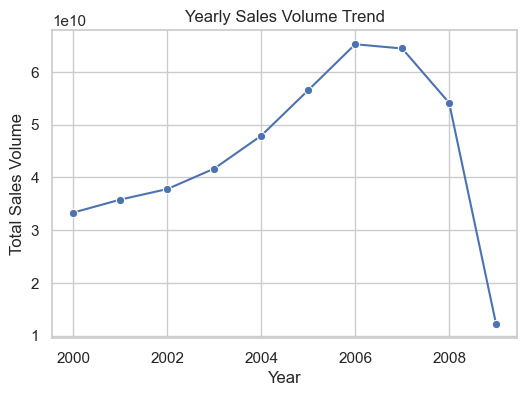

In [45]:
plt.figure(figsize=(6, 4))
sns.lineplot(x='year', y='volume', data=df_yearly, marker='o')
plt.title('Yearly Sales Volume Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales Volume')
plt.show()


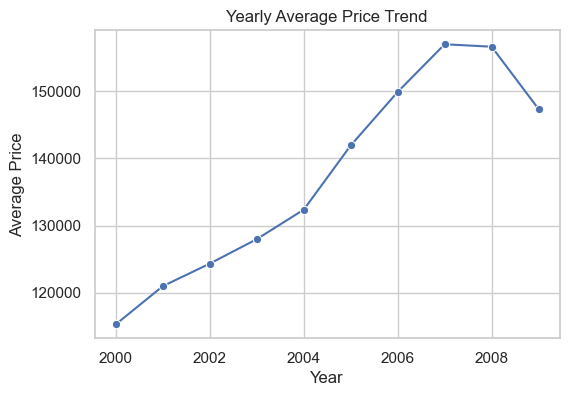

In [46]:
plt.figure(figsize=(6, 4))
sns.lineplot(x='year', y='avgprice', data=df_yearly, marker='o')
plt.title('Yearly Average Price Trend')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()


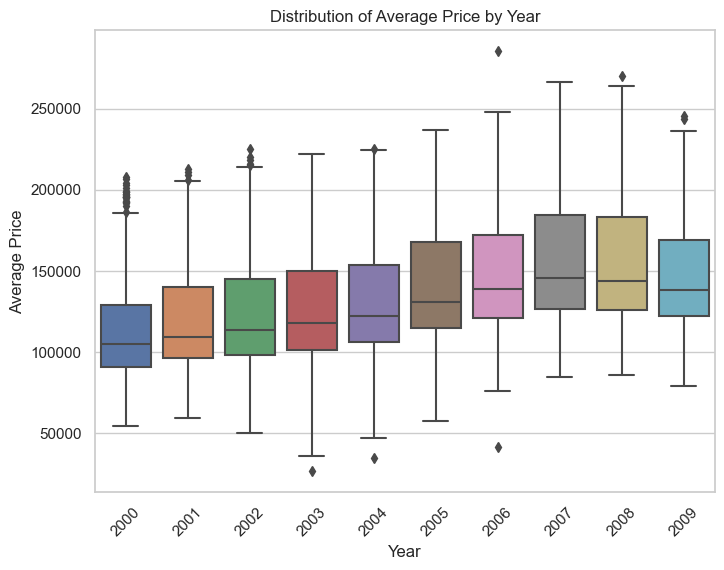

In [49]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='year', y='avgprice', data=df_cleaned)
plt.title('Distribution of Average Price by Year')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()


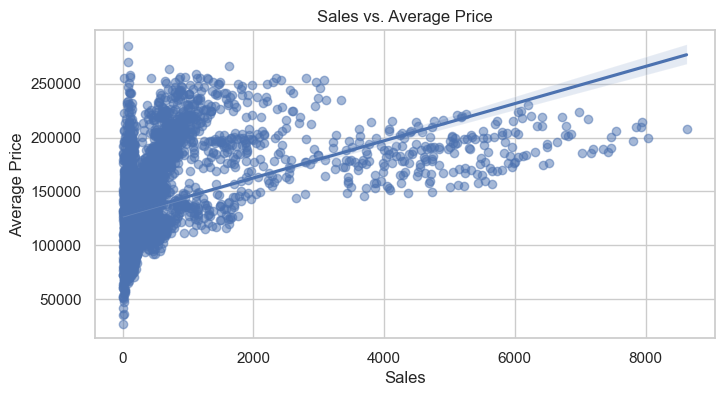

In [53]:
plt.figure(figsize=(8, 4))
sns.regplot(x='sales', y='avgprice', data=df_cleaned, scatter_kws={'alpha':0.5})
plt.title('Sales vs. Average Price')
plt.xlabel('Sales')
plt.ylabel('Average Price')
plt.show()


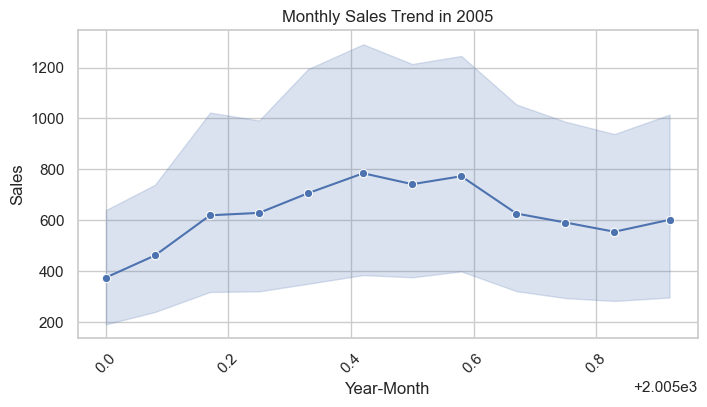

In [52]:
df_cleaned['year_month'] = df_cleaned['date'].apply(lambda x: round(x, 2))
df_2005 = df_cleaned[df_cleaned['year'] == 2005]

plt.figure(figsize=(8, 4))
sns.lineplot(x='year_month', y='sales', data=df_2005, marker='o')
plt.title('Monthly Sales Trend in 2005')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


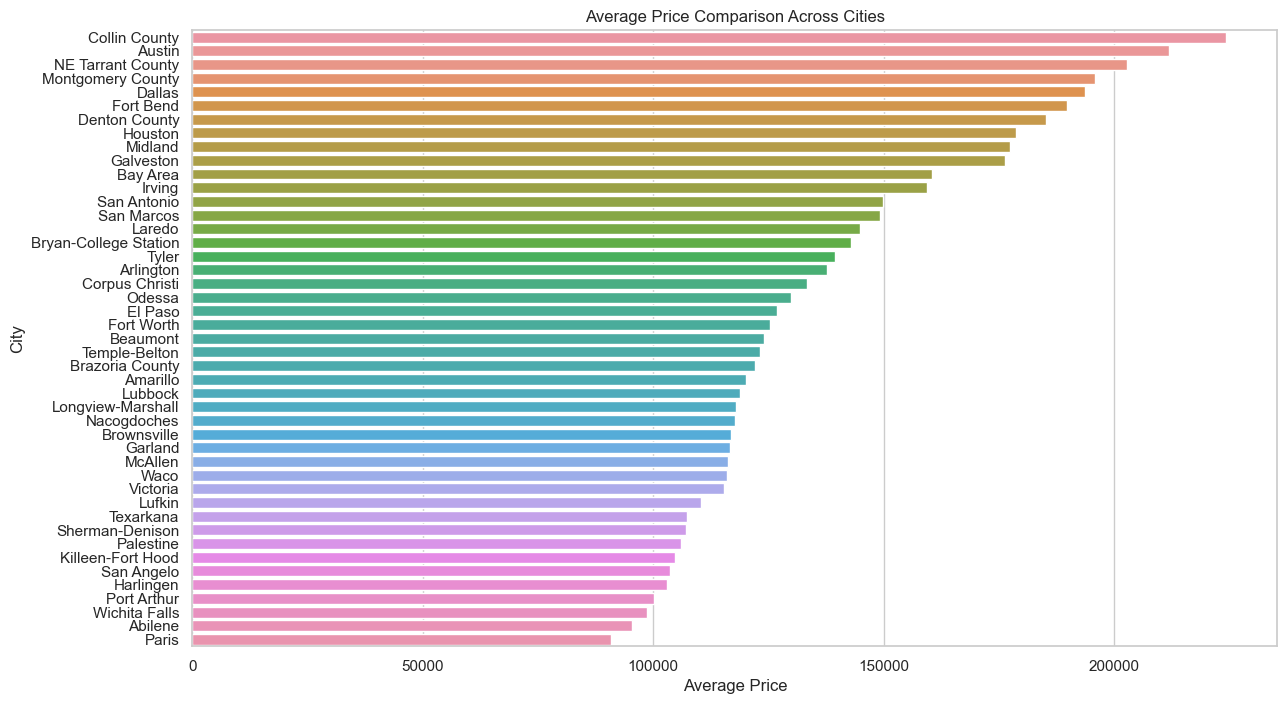

In [54]:
plt.figure(figsize=(14, 8))
sns.barplot(x='avgprice', y='city', data=df_cleaned.groupby('city')['avgprice'].mean().reset_index().sort_values('avgprice', ascending=False))
plt.title('Average Price Comparison Across Cities')
plt.xlabel('Average Price')
plt.ylabel('City')
plt.show()


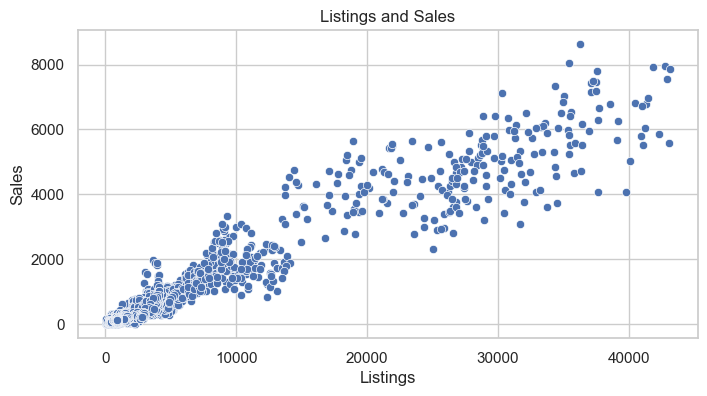

In [60]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='listings', y='sales', data=df_cleaned)
plt.title('Listings and Sales')
plt.xlabel('Listings')
plt.ylabel('Sales')
plt.show()


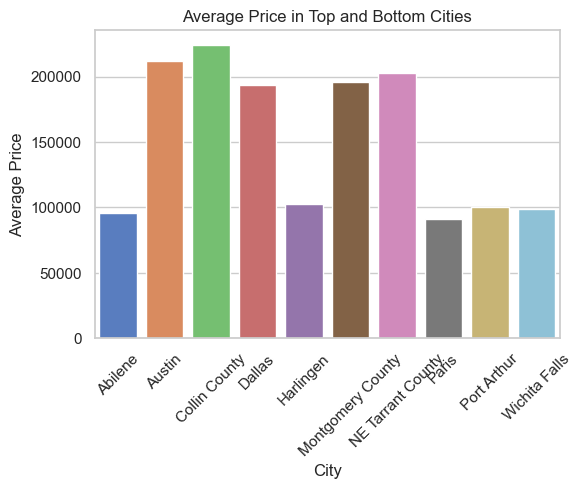

In [65]:
top_cities = df_cleaned.groupby('city')['avgprice'].mean().nlargest(5).index
bottom_cities = df_cleaned.groupby('city')['avgprice'].mean().nsmallest(5).index

df_top_bottom = df_cleaned[df_cleaned['city'].isin(top_cities.union(bottom_cities))]
df_avg_price = df_top_bottom.groupby('city')['avgprice'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='city', y='avgprice', data=df_avg_price, palette='muted')
plt.title('Average Price in Top and Bottom Cities')
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Average Price')
plt.show()


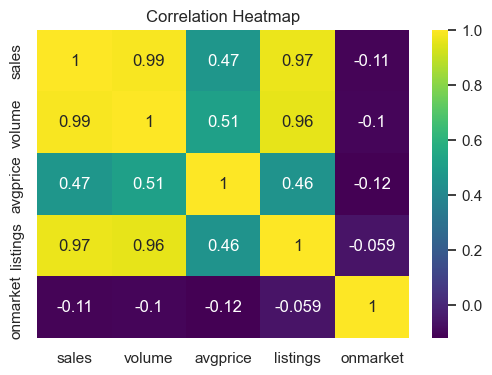

In [66]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_cleaned[['sales', 'volume', 'avgprice', 'listings', 'onmarket']].corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()
